In [1]:
import json
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# Load config
with open('config.json') as f:
    cfg = json.load(f)

# Convert to object for dot notation access
class Config:
    def __init__(self, dictionary):
        for k, v in dictionary.items():
            if isinstance(v, dict):
                setattr(self, k, Config(v))
            else:
                setattr(self, k, v)

cfg = Config(cfg)

In [2]:
from dataset.dataset import SpeechCommandsDataset, get_loader

train_dataset = SpeechCommandsDataset(
    root_dir=cfg.data.root,
    cfg=cfg,
    mode='training'
)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\jdudz\AppData\Roaming\uv\python\cpython-3.10.16-windows-x86_64-none\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\jdudz\AppData\Roaming\uv\python\cpython-3.10.16-windows-x86_64-none\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\jdudz\PycharmProjects\DeepLearningSpeechRecognition\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jdudz\Pycharm

In [3]:
# Test single sample
sample_idx = 2
waveform, label = train_dataset[sample_idx]
print(f"Sample {sample_idx}: Label = {label}, Shape = {waveform.shape}")

Sample 2: Label = 1, Shape = (16000,)



Testing representations:

WAVEFORM representation:


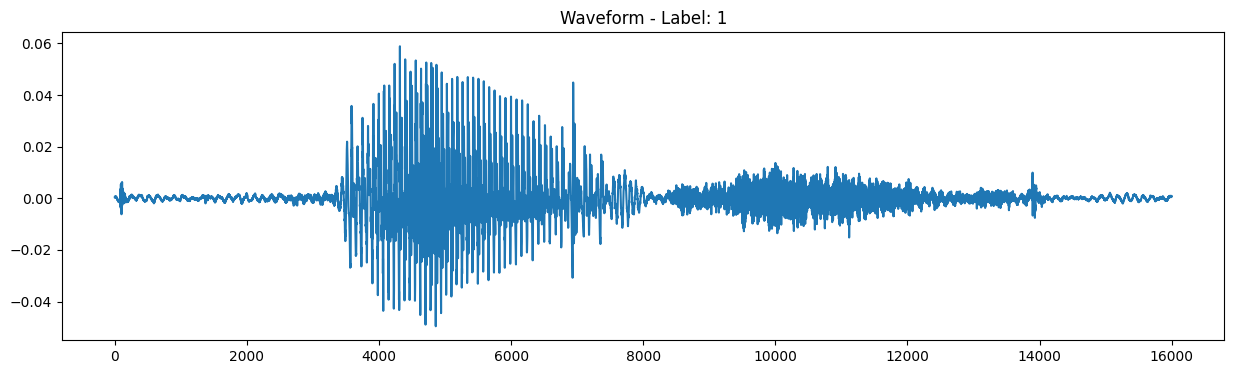


SPECTROGRAM representation:


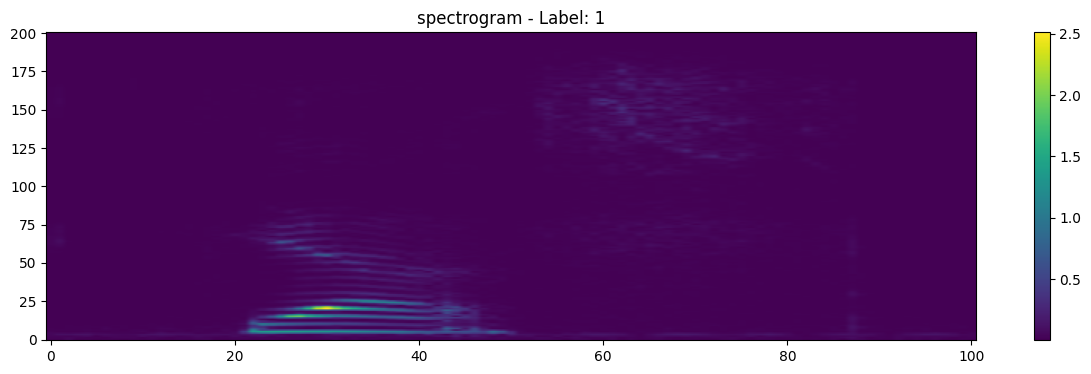


MELSPECTROGRAM representation:


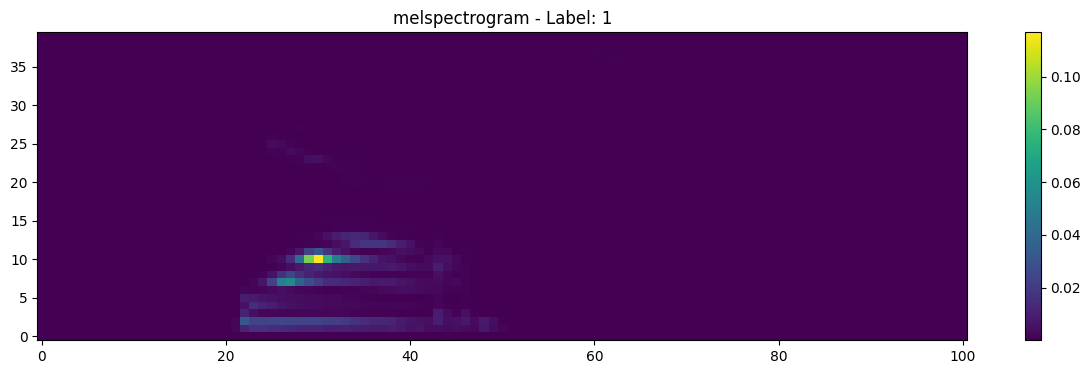


MFCC representation:


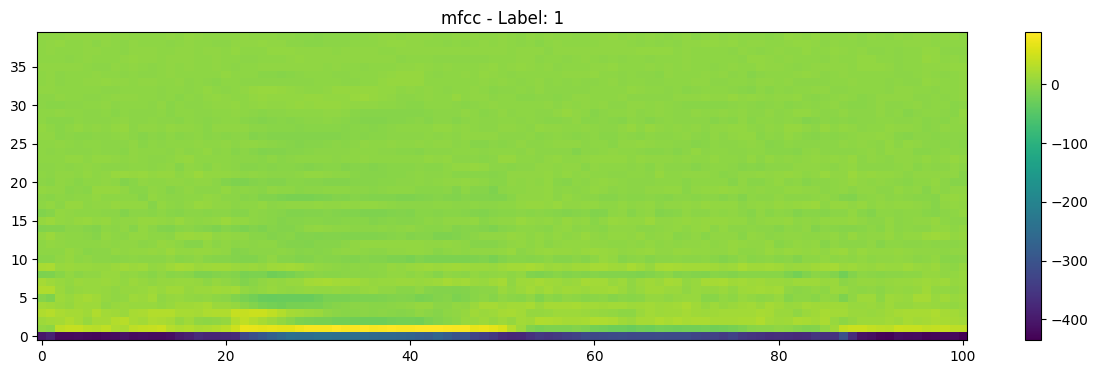

In [4]:
def show_representation(dataset, idx):
    waveform, label = dataset[idx]

    plt.figure(figsize=(15, 4))

    if dataset.cfg.data.representation == 'waveform':
        plt.plot(waveform.squeeze())
        plt.title(f"Waveform - Label: {label}")
    else:
        plt.imshow(waveform.squeeze(), aspect='auto', origin='lower')
        plt.title(f"{dataset.cfg.data.representation} - Label: {label}")
        plt.colorbar()

    plt.show()

    if hasattr(dataset, '_load_audio'):
        audio_path = dataset.filepaths[idx]
        display(Audio(audio_path))

# Test different representations
print("\nTesting representations:")
for rep in ['waveform', 'spectrogram', 'melspectrogram', 'mfcc']:
    cfg.data.representation = rep
    test_dataset = SpeechCommandsDataset(cfg.data.root, cfg, 'training')
    print(f"\n{rep.upper()} representation:")
    show_representation(test_dataset, sample_idx)

In [5]:
# Test data loader
print("\nTesting DataLoader:")
train_loader, val_loader, test_loader = get_loader(cfg)

# Get first batch
for batch in train_loader:
    inputs, labels = batch
    print(f"Batch shapes - Inputs: {inputs.shape}, Labels: {labels.shape}")
    break


Testing DataLoader:


AttributeError: Can't pickle local object 'SpeechCommandsDataset._init_audio_transforms.<locals>.mfcc_transform'

In [6]:
# Test binary mode
print("\nTesting binary mode:")
cfg.data.yes_no_binary = True
binary_dataset = SpeechCommandsDataset(cfg.data.root, cfg, 'training')
waveform, label = binary_dataset[0]
print(f"Binary label: {label} ({'yes' if label == 1 else 'no'})")


Testing binary mode:
Binary label: 1 (yes)
